In [3]:
import warnings

warnings.filterwarnings("ignore")

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

In [93]:
def XY(data):
    X_list = []
    y_list = []
    No_labels = []
    total_feature = 0

    for line in data:
        tokens = line.strip().split()
        label = []
        for l in tokens[0].split(","):
          if not(int(l) in No_labels):
            No_labels.append(int(l))
          label.append(int(l))
        features = {}
        for token in tokens[1:]:
            feature_id, feature_val = token.split(":")
            features[int(feature_id)] = float(feature_val)
            if total_feature < int(feature_id):
              total_feature = int(feature_id)

        y_list.append(label)
        X_list.append(features)

    X_train = np.zeros((len(X_list),total_feature))
    for i, features in enumerate(X_list):
        for j, val in features.items():
            X_train[i][j-1] = val

    total_labels = len(No_labels)
    y = []
    for i in y_list:
      class_list = [-1 for k in range(total_labels)]
      for j in i:
        class_list[j] = 1
      y.append(class_list) 

    y_train = np.array(y)
    return X_train,y_train

In [94]:
with open("multilabel_train_data.txt") as f:
    train_data = f.readlines()
X_train,y_train = XY(train_data)

In [48]:
with open("sample_multilabel_test_data.txt") as f:
    test_data = f.readlines()
X_test,y_test = XY(test_data)

In [49]:
df = pd.DataFrame()
for i in range(total_feature+total_labels):
  if i < total_feature:
    df['X'+str(i+1)] =  X_train[:,i]
  else:
    df['class'+str(i-total_feature)] = y_train[:,i-total_feature] 
df

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,class4,class5,class6,class7,class8,class9,class10,class11,class12,class13
0,-0.011858,-0.061636,0.054392,0.021137,0.089374,0.101825,-0.044525,0.222330,0.015575,-0.053591,...,-1,-1,1,1,-1,-1,-1,1,1,-1
1,-0.018183,-0.045645,0.002001,0.066467,-0.118108,0.105399,0.004705,0.046744,-0.060929,0.284897,...,1,-1,-1,-1,-1,-1,-1,1,1,-1
2,0.074145,-0.044487,0.048191,-0.006614,0.042746,0.025960,0.021290,0.041714,0.048671,-0.038404,...,1,1,1,1,-1,-1,1,1,1,-1
3,0.044432,-0.007842,0.018440,0.036639,0.243409,0.154859,0.128655,0.122329,0.004179,0.106768,...,-1,-1,-1,-1,-1,1,1,-1,-1,-1
4,0.051570,-0.016571,0.014702,0.024296,0.155760,0.048347,-0.031283,0.133782,0.085081,-0.047716,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,-0.116754,-0.017859,-0.051158,0.015938,0.015013,0.121055,-0.099059,0.023402,0.005873,0.019754,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
1496,0.085234,0.049690,0.134850,0.091247,0.239547,0.140304,0.166942,0.050181,0.126451,0.135792,...,1,-1,-1,-1,-1,-1,-1,1,1,-1
1497,0.074028,0.014501,-0.041893,0.030209,-0.061547,0.022142,-0.022888,0.023375,0.073267,0.019675,...,1,-1,-1,-1,-1,-1,-1,1,1,-1
1498,-0.058193,0.502205,-0.081411,-0.033651,0.001250,0.086514,-0.005469,0.033748,0.007124,-0.044017,...,-1,-1,-1,1,1,-1,-1,-1,-1,-1


In [50]:
df1 = pd.DataFrame()
for i in range(total_feature_test+total_labels_test):
  if i < total_feature_test:
    df1['X'+str(i+1)] =  X_test[:,i]
  else:
    df1['class'+str(i-total_feature_test)] = y_test[:,i-total_feature_test] 
df1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,class4,class5,class6,class7,class8,class9,class10,class11,class12,class13
0,0.097750,0.059746,0.115902,0.075859,0.097757,0.214842,0.215689,0.177362,0.178295,0.116535,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
1,0.017362,-0.004442,0.071415,0.080824,-0.158254,-0.069842,-0.165107,-0.029324,0.142120,0.042755,...,1,-1,-1,-1,-1,-1,-1,1,1,-1
2,-0.007123,-0.118310,0.134876,-0.004037,0.132463,0.126321,0.117789,-0.043311,-0.002460,-0.014554,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
3,-0.157322,-0.066659,-0.191130,-0.097811,-0.223990,-0.053608,-0.170721,-0.134466,-0.069921,0.099598,...,-1,-1,-1,-1,-1,1,1,1,1,-1
4,0.063291,0.159182,0.299849,0.116136,0.076483,-0.046788,0.076437,0.003833,0.003026,0.022628,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
5,-0.104459,0.019422,0.041862,-0.122187,0.063732,0.072451,-0.074952,0.069998,-0.031014,-0.164484,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
6,0.033091,0.003181,0.108186,0.006402,0.171886,0.115284,0.056607,-0.111114,-0.108883,0.073794,...,-1,-1,1,1,-1,-1,-1,1,1,-1
7,0.101750,0.451166,0.038766,0.174395,-0.013350,0.153172,-0.012918,0.126663,0.013990,-0.064303,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1
8,0.076186,0.476572,0.021959,-0.036541,0.016360,0.018660,0.008654,0.054223,0.056713,0.026074,...,-1,-1,-1,-1,-1,-1,-1,1,1,-1
9,0.032341,0.187232,0.019947,0.127166,0.099703,-0.070681,-0.165767,0.118108,0.150327,0.105433,...,1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [10]:
class AdaBoostMultiLabel:
    def __init__(self, base_estimator, n_estimators=50, learning_rate=1.):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators_ = []
        self.estimator_weights_ = np.zeros(n_estimators, dtype=np.float64)
        self.estimator_errors_ = np.ones(n_estimators, dtype=np.float64)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples

        for j in range(self.n_estimators):
            estimator = self.base_estimator
            selected_rows = np.random.choice(X.shape[0], size=X.shape[0], replace=True, p=w)
            estimator.fit(X[selected_rows], y[selected_rows])
            y_pred = estimator.predict(X)
            incorrect = y_pred != y
            correct = y_pred = y
            error = np.sum(w[incorrect])
            estimator_weight = self.learning_rate * np.log((1. - error) / error)

            w = np.array([w[i]*np.exp(-estimator_weight) if y_pred[i]==y[i] else w[i]*np.exp(estimator_weight) for i in range(n_samples)])
            w /= np.sum(w)
            self.estimators_.append(estimator)
            self.estimator_weights_[j] = estimator_weight
            self.estimator_errors_[j] = error
  
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i,clf in enumerate(self.estimators_):
          pred = np.add(y_pred,clf.predict(X)*self.estimator_weights_[i])
        return 2*(pred>=0)-1

In [12]:
def accuracyf1score(y, y_pred):
  accuracy = 0
  f1score = 0
  for i in range(y_pred.shape[0]):
    count1 =0
    count3 =0
    for j in range(y_pred.shape[1]):
      if y_pred[i,j]+y[i,j]==2:
        count1 += 1
      if y_pred[i,j]==1:
        count3 +=1
      if y[i,j]==1:
        count3 += 1
    f1score += count1/count3
    accuracy += count1/(count3-count1)
  return [accuracy/len(y),f1score/len(y)]

In [11]:
print('training data shape',df.shape)
print('test data shape',df1.shape)

training data shape (1500, 117)
test data shape (50, 117)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

logistic = LogisticRegression()
decision_tree = DecisionTreeClassifier(max_depth=2)
naive_bayes = GaussianNB()
svm = SVC(kernel='rbf')

parameters = {
    'clf__estimator__base_estimator': [logistic, decision_tree,naive_bayes, svm],
    'clf__estimator__n_estimators': [50, 100, 150],
    'clf__estimator__learning_rate': [0.1, 0.5, 1.0]
}

In [14]:
features = 103
labels = 14

Binary Relevance

In [18]:
train_accuracyf1score = []
test_accuracyf1score = []
model_list = []
for base_estimator in [logistic, decision_tree, naive_bayes, svm]:
  for n_estimators in [50, 100, 150]:
    y_train_pred = []
    y_test_pred = []
    for k in range(labels):
      clf = AdaBoostMultiLabel(base_estimator, n_estimators=50, learning_rate=0.5)
      clf.fit(X_train, y_train[:,k].reshape(X_train.shape[0],))
      y_train_pred.append(clf.predict(X_train))
      y_test_pred.append(clf.predict(X_test))
    y_train_pred = np.array(y_train_pred).T
    y_test_pred = np.array(y_test_pred).T
    train_accuracyf1score.append(accuracyf1score(y_train, y_train_pred))
    test_accuracyf1score.append(accuracyf1score(y_test, y_test_pred))

In [19]:
b_train_accuracyf1score = np.array(train_accuracyf1score.copy())
b_test_accuracyf1score = np.array(test_accuracyf1score.copy())

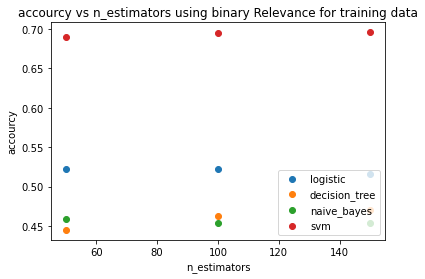

In [21]:
for i,base_estimator in enumerate([logistic, decision_tree, naive_bayes, svm]):
  plt.scatter([50, 100, 150],b_train_accuracyf1score[3*i:3*i+3,0],label=base_estimator)
  plt.xlabel('n_estimators')
  plt.ylabel('accourcy')
  plt.title('accourcy vs n_estimators using binary Relevance for training data')
plt.legend(['logistic', 'decision_tree', 'naive_bayes', 'svm'], loc ="lower right")

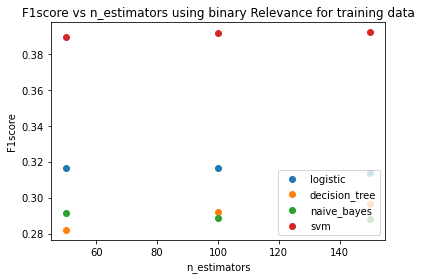

In [22]:
for i,base_estimator in enumerate([logistic, decision_tree, naive_bayes, svm]):
  plt.scatter([50, 100, 150],b_train_accuracyf1score[3*i:3*i+3,1],label=base_estimator)
  plt.xlabel('n_estimators')
  plt.ylabel('F1score')
  plt.title('F1score vs n_estimators using binary Relevance for training data')
plt.legend(['logistic', 'decision_tree', 'naive_bayes', 'svm'], loc ="lower right")

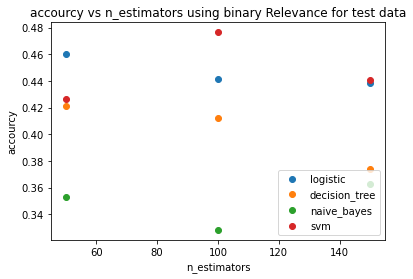

In [23]:
for i,base_estimator in enumerate([logistic, decision_tree, naive_bayes, svm]):
  plt.scatter([50, 100, 150],b_test_accuracyf1score[3*i:3*i+3,0],label=base_estimator)
  plt.xlabel('n_estimators')
  plt.ylabel('accourcy')
  plt.title('accourcy vs n_estimators using binary Relevance for test data')
plt.legend(['logistic', 'decision_tree', 'naive_bayes', 'svm'], loc ="lower right")

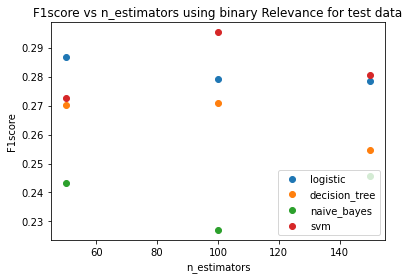

In [24]:
for i,base_estimator in enumerate([logistic, decision_tree, naive_bayes, svm]):
  plt.scatter([50, 100, 150],b_test_accuracyf1score[3*i:3*i+3,1],label=base_estimator)
  plt.xlabel('n_estimators')
  plt.ylabel('F1score')
  plt.title('F1score vs n_estimators using binary Relevance for test data')
plt.legend(['logistic', 'decision_tree', 'naive_bayes', 'svm'], loc ="lower right")

Classifier Chains

In [26]:
Xy_train = df.to_numpy()
Xy_test = df1.to_numpy()

In [27]:
train_accuracyf1score = []
test_accuracyf1score = []
model_list = []
for base_estimator in [logistic, decision_tree, naive_bayes, svm]:
  for n_estimators in [50, 100, 150]:
    y_train_pred = []
    y_test_pred = []
    for i in range(labels):
      clf = AdaBoostMultiLabel(base_estimator, n_estimators, learning_rate=0.5)
      clf.fit(Xy_train[:,:features+i], Xy_train[:,features+i].reshape(Xy_train.shape[0],))
      y_train_pred.append(clf.predict(Xy_train[:,:features+i]))
      y_test_pred.append(clf.predict(Xy_test[:,:features+i]))
    y_train_pred = np.array(y_train_pred).T
    y_test_pred = np.array(y_test_pred).T
    train_accuracyf1score.append(accuracyf1score(y_train, y_train_pred))
    test_accuracyf1score.append(accuracyf1score(y_test, y_test_pred))

In [28]:
c_train_accuracyf1score = np.array(train_accuracyf1score.copy())
c_test_accuracyf1score = np.array(test_accuracyf1score.copy())

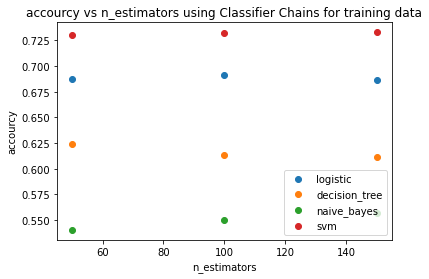

In [29]:
for i,base_estimator in enumerate([logistic, decision_tree, naive_bayes, svm]):
  plt.scatter([50, 100, 150],c_train_accuracyf1score[3*i:3*i+3,0],label=base_estimator)
  plt.xlabel('n_estimators')
  plt.ylabel('accourcy')
  plt.title('accourcy vs n_estimators using Classifier Chains for training data')
plt.legend(['logistic', 'decision_tree', 'naive_bayes', 'svm'], loc ="lower right")

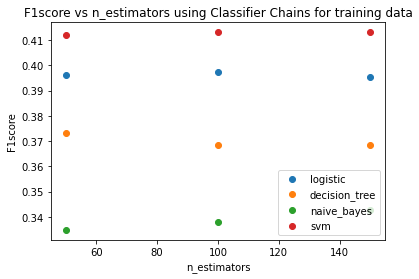

In [30]:
for i,base_estimator in enumerate([logistic, decision_tree, naive_bayes, svm]):
  plt.scatter([50, 100, 150],c_train_accuracyf1score[3*i:3*i+3,1],label=base_estimator)
  plt.xlabel('n_estimators')
  plt.ylabel('F1score')
  plt.title('F1score vs n_estimators using Classifier Chains for training data')
plt.legend(['logistic', 'decision_tree', 'naive_bayes', 'svm'], loc ="lower right")

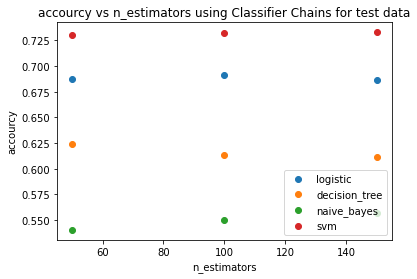

In [31]:
for i,base_estimator in enumerate([logistic, decision_tree, naive_bayes, svm]):
  plt.scatter([50, 100, 150],c_train_accuracyf1score[3*i:3*i+3,0],label=base_estimator)
  plt.xlabel('n_estimators')
  plt.ylabel('accourcy')
  plt.title('accourcy vs n_estimators using Classifier Chains for test data')
plt.legend(['logistic', 'decision_tree', 'naive_bayes', 'svm'], loc ="lower right")

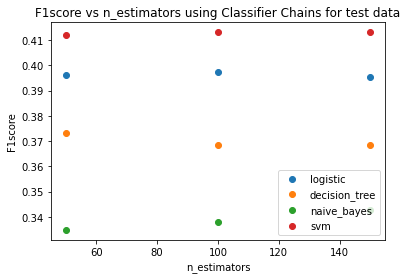

In [32]:
for i,base_estimator in enumerate([logistic, decision_tree, naive_bayes, svm]):
  plt.scatter([50, 100, 150],c_train_accuracyf1score[3*i:3*i+3,1],label=base_estimator)
  plt.xlabel('n_estimators')
  plt.ylabel('F1score')
  plt.title('F1score vs n_estimators using Classifier Chains for test data')
plt.legend(['logistic', 'decision_tree', 'naive_bayes', 'svm'], loc ="lower right")

#Binary Relevance table

Training data

In [80]:
df4 = pd.DataFrame()
df4['Model'] = ['logistic', 'decision_tree', 'naive_bayes', 'svm']
for j,i in enumerate([50, 100, 150]):
    df4['Accourcy(n ='+str(i)+')'] = b_train_accuracyf1score[[j,j+3,j+6,j+9]][:,0]
    df4['F1_score(n ='+str(i)+')'] = b_train_accuracyf1score[[j,j+3,j+6,j+9]][:,1]
df4

,Model,Accourcy(n =50),F1_score(n =50),Accourcy(n =100),F1_score(n =100),Accourcy(n =150),F1_score(n =150)
0,logistic,0.522701,0.316405,0.522426,0.316610,0.516365,0.313917
1,decision_tree,0.445100,0.281993,0.463158,0.292109,0.470004,0.296475
2,naive_bayes,0.458457,0.291577,0.453663,0.288918,0.453975,0.288232
3,svm,0.690067,0.389428,0.694634,0.391832,0.695702,0.392057


Test data

In [82]:
df6 = pd.DataFrame()
df6['Model'] = ['logistic', 'decision_tree', 'naive_bayes', 'svm']
for j,i in enumerate([50, 100, 150]):
    df6['Accourcy(n ='+str(i)+')'] = b_test_accuracyf1score[[j,j+3,j+6,j+9]][:,0]
    df6['F1_score(n ='+str(i)+')'] = b_test_accuracyf1score[[j,j+3,j+6,j+9]][:,1]
df6

,Model,Accourcy(n =50),F1_score(n =50),Accourcy(n =100),F1_score(n =100),Accourcy(n =150),F1_score(n =150)
0,logistic,0.460024,0.286669,0.441087,0.279262,0.438738,0.278304
1,decision_tree,0.421397,0.270143,0.411802,0.270927,0.373952,0.254543
2,naive_bayes,0.352619,0.243385,0.328127,0.227052,0.362706,0.245716
3,svm,0.426294,0.272709,0.476444,0.295263,0.440833,0.280494


#Classifier Chains

Training data

In [79]:
df5 = pd.DataFrame()
df5['Model'] = ['logistic', 'decision_tree', 'naive_bayes', 'svm']
for j,i in enumerate([50, 100, 150]):
    df5['Accourcy(n ='+str(i)+')'] = c_train_accuracyf1score[[j,j+3,j+6,j+9]][:,0]
    df5['F1_score(n ='+str(i)+')'] = c_train_accuracyf1score[[j,j+3,j+6,j+9]][:,1]
df5

,Model,Accourcy(n =50),F1_score(n =50),Accourcy(n =100),F1_score(n =100),Accourcy(n =150),F1_score(n =150)
0,logistic,0.687717,0.396135,0.691561,0.397238,0.686940,0.395259
1,decision_tree,0.624395,0.373197,0.613559,0.368477,0.611967,0.368503
2,naive_bayes,0.540399,0.334840,0.549750,0.338163,0.557406,0.342579
3,svm,0.730638,0.411921,0.732261,0.413108,0.732869,0.413119


Testing 

In [83]:
df7 = pd.DataFrame()
df7['Model'] = ['logistic', 'decision_tree', 'naive_bayes', 'svm']
for j,i in enumerate([50, 100, 150]):
    df7['Accourcy(n ='+str(i)+')'] = c_test_accuracyf1score[[j,j+3,j+6,j+9]][:,0]
    df7['F1_score(n ='+str(i)+')'] = c_test_accuracyf1score[[j,j+3,j+6,j+9]][:,1]
df7

,Model,Accourcy(n =50),F1_score(n =50),Accourcy(n =100),F1_score(n =100),Accourcy(n =150),F1_score(n =150)
0,logistic,0.614968,0.367587,0.641230,0.374263,0.639730,0.376433
1,decision_tree,0.607040,0.365897,0.589754,0.360341,0.580111,0.350756
2,naive_bayes,0.457810,0.298508,0.471992,0.303464,0.499373,0.316016
3,svm,0.675833,0.388579,0.662516,0.386012,0.666484,0.385044


from above expriment we can see svm work good for training as well as testing so i am going to use svm for storing the result.

User input of test file

In [33]:
def binary_predication(X,models):
    y_pred = []
    for model in models:
        y_pred.append(model.predict(X))
    return np.array(y_pred).T

In [43]:
def chain_predication(X,models):
    y_pred = []
    for model in models:
        y_pred.append(clf.predict(X[:,:features+i]))
    return np.array(y_pred).T

In [65]:
import pickle

model_lists1 = []
model_lists2 = []
for k in range(labels):
  base_estimator = svm #= SVC(kernel='rbf')
  clf = AdaBoostMultiLabel(base_estimator, n_estimators=100, learning_rate=0.5)
  clf.fit(X_train, y_train[:,k].reshape(X_train.shape[0],))
  clf1 = AdaBoostMultiLabel(base_estimator, n_estimators, learning_rate=0.5)
  clf1.fit(Xy_train[:,:features+i], Xy_train[:,features+i].reshape(Xy_train.shape[0],))
  model_lists1.append(clf)
  model_lists2.append(clf1)

model_list.append(model_lists1)
model_list.append(model_lists2)

with open('IE506_22n0452_CHALLENGE_MODEL.pkl', 'wb') as f:
    pickle.dump(model_list, f)

In [ ]:
""""
need to modify having some error for when i store the model and going to use it
""""
# Load the models from the pickle file
# with open('IE506_22n0452_CHALLENGE_MODEL.pkl', 'rb') as file:
#     my_model_list = pickle.load(file)
#     my_model_list1 = my_model_list[0]
#     my_model_list2 = my_model_list[1]
    
# for Binary Relevance
# y_train_pred = binary_predication(X_train,my_model_lists1)
# train_accuracyf1score = accuracyf1score(y_train, y_train_pred)
# test_accuracyf1score = accuracyf1score(y_test, y_test_pred)

# print("training accuracy : ",train_accuracyf1score[0],
#      "test accuracy : ",test_accuracyf1score[0])
# print("training F1score : ",train_accuracyf1score[1],
#      "test F1score : ",test_accuracyf1score[1])

# for Classifier Chains
# y_train_pred = chain_predication(X_train,my_model_lists1)
# train_accuracyf1score = accuracyf1score(y_train, y_train_pred)
# test_accuracyf1score = accuracyf1score(y_test, y_test_pred)

# print("training accuracy : ",train_accuracyf1score[0],
#      "test accuracy : ",test_accuracyf1score[0])
# print("training F1score : ",train_accuracyf1score[1],
#      "test F1score : ",test_accuracyf1score[1])

In [91]:
"""
input your test data which is same format given for training
i.e. test file is of the form 0,1,12 10:1 13:0.5 19:2 135:5 then it means that
the i-th sample is associated with multiple labels 0,1,12 and the 10-th feature 
of i-th sample has a value 1, 13-th feature of i-th sample has a value 0.5, 
19-th feature of i-th sample has a value 2 and 135-th feature of i-th sample has a value 5. 
All other features of i-th sample have value 0.
"""
with open("sample_multilabel_test_data.txt") as f:#for example i used same test file which is given to us
    data = f.readlines()
x_test,y_test = XY(data)

In [92]:
df3 = pd.DataFrame()
for i in range(total_feature+total_labels):
  if i < total_feature:
    df3['X'+str(i+1)] =  x_test[:,i]
  else:
    df3['class'+str(i-total_feature)] = y_test[:,i-total_feature] 
Xy_test = df3.to_numpy()

In [96]:
def actually_labels(y):
    actually_labels = []
    for i in range(y.shape[0]):
        labels = []
        for j in range(y.shape[1]):
            if y[i,j]==1:
                labels.append(j)
        actually_labels.append(labels)
    return actually_labels

In [116]:
#since loading part having some error i am going to use here decision tree which give quick result but for better we can use svm
# for Binary Relevance
y_test_pred = []
for k in range(labels):
  base_estimator = svm#DecisionTreeClassifier(max_depth=5)
  clf = AdaBoostMultiLabel(base_estimator, n_estimators=100, learning_rate=0.5)
  clf.fit(X_train, y_train[:,k].reshape(X_train.shape[0],))
  y_test_pred.append(clf.predict(x_test))

y_test_pred1 = np.array(y_test_pred).T

test_accuracyf1score = accuracyf1score(y_test, y_test_pred1)
print('using binary relevance')
print("test accourcy : ",test_accuracyf1score[0],
     "test F1score : ",test_accuracyf1score[1])


# for chain classifer
y_train_pred = []
y_test_pred = []
for i in range(labels):
  base_estimator = svm#DecisionTreeClassifier(max_depth=5)
  clf = AdaBoostMultiLabel(base_estimator, n_estimators=100, learning_rate=0.5)
  clf.fit(Xy_train[:,:features+i], Xy_train[:,features+i].reshape(Xy_train.shape[0],))
  y_test_pred.append(clf.predict(Xy_test[:,:features+i]))

y_test_pred2 = np.array(y_test_pred).T


test_accuracyf1score = accuracyf1score(y_test, y_test_pred2)
print('using chain classifer')
print("test accourcy : ",test_accuracyf1score[0],
     "test F1score : ",test_accuracyf1score[1])

using binary relevance
test accourcy :  0.45865873015873 test F1score :  0.28574747474747475
using chain classifer
test accourcy :  0.6751190476190476 test F1score :  0.3881596181596181


chain classifer

In [117]:
DF = pd.DataFrame()
DF['Y'] = actually_labels(y_test)
DF['Y_pred(Binary_Relevance_and_svm_as_a_base_lerner)'] = actually_labels(y_test_pred1)
DF['Y_pred(chain_classifer_and_svm_as_a_base_lerner)'] = actually_labels(y_test_pred2)
DF

,Y,Y_pred(Binary_Relevance_and_svm_as_a_base_lerner),Y_pred(chain_classifer_and_svm_as_a_base_lerner)
0,"[0, 11, 12]","[0, 12]","[0, 11, 12]"
1,"[3, 4, 11, 12]","[11, 12]","[4, 11, 12]"
2,"[4, 5]","[1, 2, 11]","[2, 5, 11]"
3,"[2, 3, 9, 10, 11, 12]","[6, 7, 11, 12]","[3, 10, 11, 12]"
4,"[0, 11, 12]","[0, 11, 12]","[0, 11, 12]"
5,"[2, 3, 11, 12]","[2, 11, 12]","[3, 11, 12]"
6,"[6, 7, 11, 12]","[2, 11, 12]","[2, 7, 11, 12]"
7,"[1, 2, 4, 5]","[4, 11, 12]","[2, 5, 11]"
8,"[2, 3, 11, 12]","[2, 3, 11, 12]","[2, 3, 11, 12]"
9,"[4, 5]","[1, 2, 11, 12]","[1, 2, 5, 11]"


#################################################################################
#################################################################################
#################################################################################

In [121]:
"""
please use below code to run and check the performance of the my model 
from these classifer 'logistic', 'decision_tree', 'naive_bayes', 'svm' any of them you can choice 
for base classifier but while choice base classifer make a note them svm take more time as compare to 
other learner but give better result so choice accordingly. 
"""

"\nplease use below code to run and check the performance of the my model \nfrom these classifer 'logistic', 'decision_tree', 'naive_bayes', 'svm' any of them you can choice \nfor base classifier but while choice base classifer make a note them svm take more time as compare to \nother learner but give better result so choice accordingly. \n"

In [135]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

logistic = LogisticRegression()
decision_tree = DecisionTreeClassifier(max_depth=2)
naive_bayes = GaussianNB()
svm = SVC(kernel='rbf')

def XY(data):
    X_list = []
    y_list = []
    No_labels = []
    total_feature = 0

    for line in data:
        tokens = line.strip().split()
        label = []
        for l in tokens[0].split(","):
          if not(int(l) in No_labels):
            No_labels.append(int(l))
          label.append(int(l))
        features = {}
        for token in tokens[1:]:
            feature_id, feature_val = token.split(":")
            features[int(feature_id)] = float(feature_val)
            if total_feature < int(feature_id):
              total_feature = int(feature_id)

        y_list.append(label)
        X_list.append(features)

    X_train = np.zeros((len(X_list),total_feature))
    for i, features in enumerate(X_list):
        for j, val in features.items():
            X_train[i][j-1] = val

    total_labels = len(No_labels)
    y = []
    for i in y_list:
      class_list = [-1 for k in range(total_labels)]
      for j in i:
        class_list[j] = 1
      y.append(class_list) 

    y_train = np.array(y)
    return X_train,y_train

with open("multilabel_train_data.txt") as f: # make sure you have multilabel_train_data.txt
    train_data = f.readlines()
X_train,y_train = XY(train_data)

total_feature = 103
total_labels = 14

df = pd.DataFrame()
for i in range(total_feature+total_labels):
  if i < total_feature:
    df['X'+str(i+1)] =  X_train[:,i]
  else:
    df['class'+str(i-total_feature)] = y_train[:,i-total_feature]
    
class AdaBoostMultiLabel:
    def __init__(self, base_estimator, n_estimators=50, learning_rate=1.):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.estimators_ = []
        self.estimator_weights_ = np.zeros(n_estimators, dtype=np.float64)
        self.estimator_errors_ = np.ones(n_estimators, dtype=np.float64)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        w = np.ones(n_samples) / n_samples

        for j in range(self.n_estimators):
            estimator = self.base_estimator
            selected_rows = np.random.choice(X.shape[0], size=X.shape[0], replace=True, p=w)
            estimator.fit(X[selected_rows], y[selected_rows])
            y_pred = estimator.predict(X)
            incorrect = y_pred != y
            correct = y_pred = y
            error = np.sum(w[incorrect])
            estimator_weight = self.learning_rate * np.log((1. - error) / error)

            w = np.array([w[i]*np.exp(-estimator_weight) if y_pred[i]==y[i] else w[i]*np.exp(estimator_weight) for i in range(n_samples)])
            w /= np.sum(w)
            self.estimators_.append(estimator)
            self.estimator_weights_[j] = estimator_weight
            self.estimator_errors_[j] = error
  
    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for i,clf in enumerate(self.estimators_):
          pred = np.add(y_pred,clf.predict(X)*self.estimator_weights_[i])
        return 2*(pred>=0)-1

def accuracyf1score(y, y_pred):
  accuracy = 0
  f1score = 0
  for i in range(y_pred.shape[0]):
    count1 =0
    count3 =0
    for j in range(y_pred.shape[1]):
      if y_pred[i,j]+y[i,j]==2:
        count1 += 1
      if y_pred[i,j]==1:
        count3 +=1
      if y[i,j]==1:
        count3 += 1
    f1score += count1/count3
    accuracy += count1/(count3-count1)
  return [accuracy/len(y),f1score/len(y)]

def actually_labels(y):
    actually_labels = []
    for i in range(y.shape[0]):
        labels = []
        for j in range(y.shape[1]):
            if y[i,j]==1:
                labels.append(j)
        actually_labels.append(labels)
    return actually_labels


# ( Enter name of your file like  multilabel_train_data.txt )
test_file = input("Enter name of your file ") # make sure your file available
with open(test_file) as f:
    train_data = f.readlines()
x_test,y_test = XY(train_data) # created features and labels 

""""
 for considering  base learner time will take to train accordingly since i have save my model but 
 when i am using that model which some error so that is not in working state that's why i need to 
 train every time (svm take more time but give better result if you wan't to see comparison between
 them see above plot and table).
"""

# name of the learner should be according to option which either it will give error(enter learner name for avoiding error just copy and paste the name)
learner = input("Enter the base learner to use (logistic, decision_tree, naive_bayes, svm): ")

#classifer chain which better result for give training data as compare to binary_relevance(1 for binary 2 for chain_classifer)
method = int(input("Which method you want to impliment(Binary_Relevance/chain_classifer)for(1/2) "))

y_test_pred = []

labels = 14

for k in range(labels):
    indx = ['logistic', 'decision_tree', 'naive_bayes', 'svm'].index(learner)
    base_estimator = [logistic, decision_tree, naive_bayes, svm][indx]
    if method ==1:
        clf = AdaBoostMultiLabel(base_estimator, n_estimators=100, learning_rate=0.5)
        clf.fit(X_train, y_train[:,k].reshape(X_train.shape[0],))
        y_test_pred.append(clf.predict(x_test))
    else:
        clf = AdaBoostMultiLabel(base_estimator, n_estimators=100, learning_rate=0.5)
        clf.fit(Xy_train[:,:features+k], Xy_train[:,features+k].reshape(Xy_train.shape[0],))
        y_test_pred.append(clf.predict(Xy_test[:,:features+k]))
   
y_test_pred = np.array(y_test_pred).T

test_accuracyf1score = accuracyf1score(y_test, y_test_pred)
print('method',method)
print("test accourcy : ",test_accuracyf1score[0],
     "test F1score : ",test_accuracyf1score[1])
    
Df = pd.DataFrame()
Df['Y'] = actually_labels(y_test)
Df['Y_pred('+str(method)+')'] = actually_labels(y_test_pred)
Df

Enter name of your file sample_multilabel_test_data.txt
Enter the base learner to use (logistic, decision_tree, naive_bayes, svm): decision_tree
Which method you want to impliment(Binary_Relevance/chain_classifer)for(1/2) 2
method 2
test accourcy :  0.6117698412698414 test F1score :  0.3676033411033411


,Y,Y_pred(2)
0,"[0, 11, 12]","[1, 11, 12]"
1,"[3, 4, 11, 12]","[4, 11, 12]"
2,"[4, 5]","[5, 11]"
3,"[2, 3, 9, 10, 11, 12]","[3, 10, 11, 12]"
4,"[0, 11, 12]","[0, 1, 11, 12]"
5,"[2, 3, 11, 12]","[3, 11, 12]"
6,"[6, 7, 11, 12]","[7, 11, 12]"
7,"[1, 2, 4, 5]","[2, 5, 11]"
8,"[2, 3, 11, 12]","[3, 11, 12]"
9,"[4, 5]","[5, 11]"
